<h1> 2. SARIMA(p,d,q)(P,D,Q)[m] </h1>

<h2> Preprocesamiento de datos y packages </h2>

In [2]:
library(ggplot2)
library(xts)
library(forecast)
library(dplyr)
library(tseries)
library(zoo)
library(quantmod)
library(nortest) #Para pruebas de normalidad
library(TTR)
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")#Leer DF
Ton_Netas_P <- Ton_Netas_P[-99,]#Elimino la última fila
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
T_N_Pro  <- Ton_Netas_P # Contiene las fechas
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1], frequency = 12, star = c(2014,1))
ModB_ARIMA <- arima(Maiz_ts , order = c(1,0,0)) #Modelo ARIMA(1,0,0)

In [7]:
auto.arima(Maiz_ts)

Series: Maiz_ts 
ARIMA(1,0,1)(0,1,1)[12] with drift 

Coefficients:
         ar1      ma1     sma1     drift
      0.7384  -0.3824  -0.7926  3268.075
s.e.  0.1457   0.1997   0.2065  1071.698

sigma^2 estimated as 1.704e+10:  log likelihood=-1138.93
AIC=2287.86   AICc=2288.61   BIC=2300.13

<h2> Correlograma $ACF$ y $PACF$ del modelo ARIMA(1,0,0) </h2>

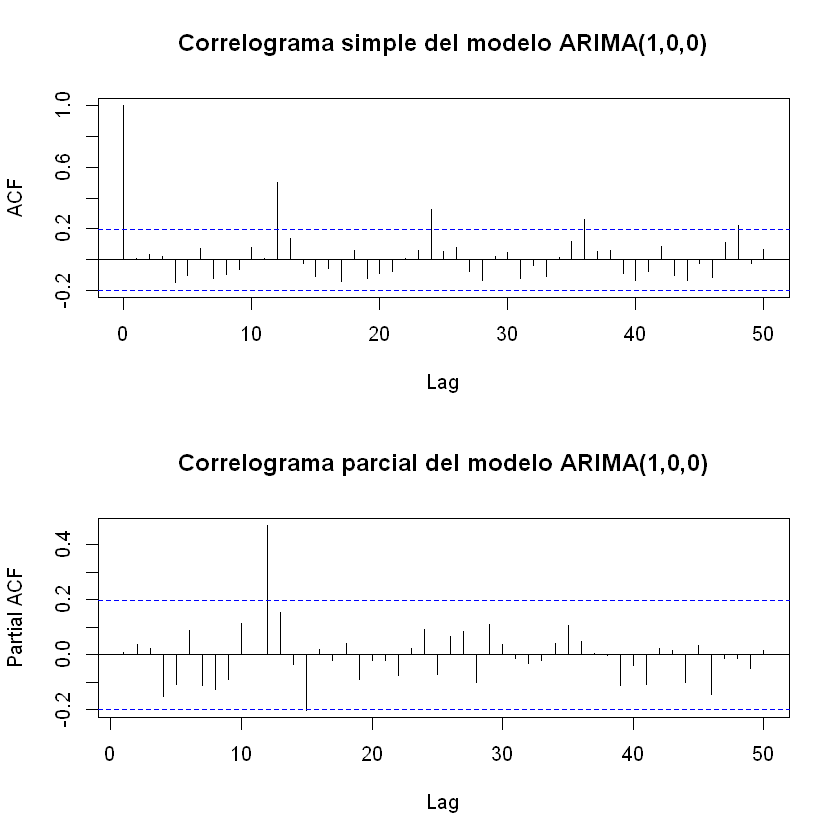

In [26]:
layout(1:2)
acf(ts(ModB_ARIMA$residuals), 50 ,
    main = "Correlograma simple del modelo ARIMA(1,0,0)")
pacf(ts(ModB_ARIMA$residuals), 50 ,
    main = "Correlograma parcial del modelo ARIMA(1,0,0)")

Tanto en el Correlograma Simple, como el en Correlograma Parcial existen valores signficativo $\varphi $. Este tipo de comportamiento en los correlogramas indican que aún hay factores que no están considerando en los modelos y afectan de manera importante el comportamiento de la serie temporal. 

Es importante observar que, de acuerdo con el correlograma simple, los valores fuera del intervalo representan un comportamiento similar, ya que se repiten cada determinado tiempo de acuerdo al rezago de la serie, en este caso, cada múltiplo del rezago $12$. **Este tipo de comportamiento es bastante común en las series temporales que presentan un comportamiento estacional;** es decir, que tiene un efecto temporal que se repite cada determinado período. 

Para poder estimar modelos que consideren el comportamiento estacional de las series podemos ocupar los modelos $SARIMA$. Para incorporar el comportamiento estacional de la serie, podemos anexar un factor de diferenciación adicional al de integración, con el fin de diferencial de acuerdo con el componente estacional. Para empezar a estimar modelos $SARIMA$, propongo realizar $1$ diferencia estacional que se le deberá aplicar a la serie (lo que significa que debemos de diferenciar sobre $12$ unidades, ya que la serie es una serie mensual). 

De acuerdo a lo anterior, propongo $9$ propuestas de modelos SARIMA en donde únicamente variaremos el número de valores Autorregresivos y Medias Móviles, así como el orden de integración normal del modelo.


In [17]:
ndiffs(Maiz_ts) # Nos da el número de diferenciación ordinaria
nsdiffs(Maiz_ts) #Nos da el número de diferenciación estacional

[1] 1

[1] 1

<h2> Modelos SARIMA(p,d,q)(P,D,Q) propuestos </h2>

In [20]:
SARIMA_1<- arima(Maiz_ts,order=c(1,1,1), seasonal = list(order=c(0,1,1)))
SARIMA_2<- arima(Maiz_ts,order=c(0,1,1), seasonal = list(order=c(0,1,1)))
SARIMA_3<- arima(Maiz_ts,order=c(1,1,0), seasonal = list(order=c(0,1,1)))
SARIMA_4<- arima(Maiz_ts,order=c(1,1,1), seasonal = list(order=c(1,1,1)))
SARIMA_5<- arima(Maiz_ts,order=c(0,1,1), seasonal = list(order=c(1,1,1)))
SARIMA_6<- arima(Maiz_ts,order=c(1,1,0), seasonal = list(order=c(1,1,1)))
SARIMA_7<- arima(Maiz_ts,order=c(1,1,1), seasonal = list(order=c(1,1,0)))
SARIMA_8<- arima(Maiz_ts,order=c(0,1,1), seasonal = list(order=c(1,1,0)))
SARIMA_9<- arima(Maiz_ts,order=c(1,1,0), seasonal = list(order=c(1,1,0)))

Vamos a utilizar el mejor modelo de acuerdo con los **Criterios de Información**

<h2> Criterios de Información </h2>

In [22]:
SARIMA_1$aic
SARIMA_2$aic
SARIMA_3$aic
SARIMA_4$aic
SARIMA_5$aic
SARIMA_6$aic
SARIMA_7$aic
SARIMA_8$aic
SARIMA_9$aic

[1] 2265.639

[1] 2266.262

[1] 2274.933

[1] 2265.459

[1] 2265.818

[1] 2274.692

[1] 2275.807

[1] 2277.278

[1] 2285.34

**Conclusión:** De acuerdo a los resultados de cada modelo, el mejor modelo obtenido es el modelo $SARIMA(1,1,1)(1,1,1)$..

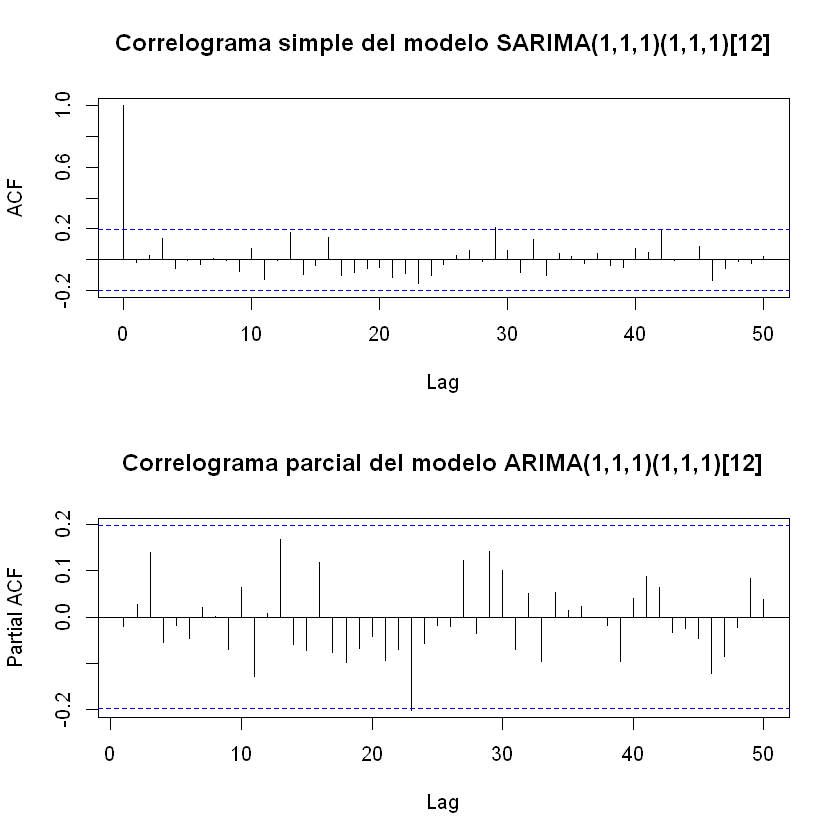

In [28]:
layout(1:2)
acf(ts(SARIMA_4$residuals), 50 ,
    main = "Correlograma simple del modelo SARIMA(1,1,1)(1,1,1)[12]")
pacf(ts(SARIMA_4$residuals), 50 ,
    main = "Correlograma parcial del modelo ARIMA(1,1,1)(1,1,1)[12]")